Check GPU

In [ ]:
!nvidia-smi

Fri May 27 21:16:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    41W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri May 27 21:12:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    40W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Load Google Drive 

In [ ]:
from google.colab import drive #Only if you are using Google Drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)
%cd /content/gdrive/My\ Drive/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Mounted at /content/gdrive
/content/gdrive/My Drive


Location of spectograms for home location, small sample testing

In [ ]:
cd /content/gdrive/MyDrive/urbansound/spectograms/

/content/gdrive/MyDrive/urbansound/spectograms


In [ ]:
! unzip test.zip

In [ ]:
! unzip train.zip

In [ ]:
! unzip validation.zip

In [ ]:
! ls -lrt /content/gdrive/MyDrive/urbansound/spectograms/ | wc

      5      38     212


In [ ]:
%tensorflow_version  1.x

TensorFlow 1.x selected.


**Model**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

training_dir = '/content/gdrive/MyDrive/urbansound/spectograms/train/' 
validation_dir = '/content/gdrive/MyDrive/urbansound/spectograms/test/'
test_dir = '/content/gdrive/MyDrive/urbansound/spectograms/test'

folders = glob(training_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))
print('Total training classes '+str(len(glob(training_dir + '/*'))))
print('Total test classes '+str(len(glob(test_dir + '/*'))))
print('Toral validation classes '+str(len(glob(validation_dir + '/*'))))

Total Classes = 10
Total training classes 10
Total test classes 10
Toral validation classes 10


Check folders

In [ ]:
import pandas as pd
import os
import shutil


dir1 = '/content/gdrive/MyDrive/urbansound/spectograms/validation'
dir2 = '/content/gdrive/MyDrive/urbansound/spectograms/train'
dir3 = '/content/gdrive/MyDrive/urbansound/spectograms/test'
validations = os.listdir(dir1)
trains = os.listdir(dir2)
tests = os.listdir(dir3)
print(trains)
print(tests)
#if os.path.isdir(targetdir_chk) == False:
    # os.mkdir(targetdir_chk)
#    print(targetdir_chk + ' directory does not exist so it was created')

list_difference = []
for item in validations:
  if item not in trains:
    list_difference.append(item)

print('the following are missing directories:')
print(list_difference)

#create the missing directories in test
for item in list_difference:
    print(item)
    dir2create = '/Users/gracie/ML/AEA_dataset/freesound/spectograms/validation/'+item
    if os.path.isdir(item) == False:
        #os.mkdir(dir2create)
        print(dir2create + ' created')

######################
list_difference2 = []
for item in tests:
  if item not in validations:
    list_difference2.append(item)

print('the following are missing directories:')
print(list_difference2)

#create the missing directories in test
for item in list_difference2:
    print(item)
    dir2create = '/Users/gracie/ML/AEA_dataset/freesound/spectograms/validation/'+item
    if os.path.isdir(item) == False:
        #os.mkdir(dir2create)
        print(dir2create + ' created')

['dog_bark', 'children_playing', 'air_conditioner', 'street_music', 'engine_idling', 'jackhammer', 'drilling', 'siren', 'car_horn', 'gun_shot']
['dog_bark', 'children_playing', 'air_conditioner', 'street_music', 'engine_idling', 'jackhammer', 'drilling', 'siren', 'car_horn', 'gun_shot']
the following are missing directories:
[]
the following are missing directories:
[]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

training_dir = '/content/gdrive/MyDrive/urbansound/spectograms/train/' 
validation_dir = '/content/gdrive/MyDrive/urbansound/spectograms/validation/'
test_dir = '/content/gdrive/MyDrive/urbansound/spectograms/test'

folders = glob(training_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

Total Classes = 10


Import Libraries

In [ ]:
# importing requried libraries
from keras import applications
from keras.models import Model
import keras 
from keras.applications.vgg16 import VGG16 #Importing the VGG16 Model
from keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D,BatchNormalization
#from keras.applications.mobilenet import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input  

**Data pre-processing**

In [ ]:
IMAGE_SIZE = [224,224]

training_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, samplewise_center=True, samplewise_std_normalization=True)
training_generator = training_datagen.flow_from_directory(directory=training_dir,target_size = IMAGE_SIZE, batch_size = 32, class_mode = 'categorical')
validation_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, samplewise_center=True, samplewise_std_normalization=True)
validation_generator = validation_datagen.flow_from_directory(directory=test_dir, target_size = IMAGE_SIZE, batch_size = 32, class_mode = 'categorical')
training_generator.class_indices


Found 6981 images belonging to 10 classes.
Found 1747 images belonging to 10 classes.


{'air_conditioner': 0,
 'car_horn': 1,
 'children_playing': 2,
 'dog_bark': 3,
 'drilling': 4,
 'engine_idling': 5,
 'gun_shot': 6,
 'jackhammer': 7,
 'siren': 8,
 'street_music': 9}

In [ ]:
IMAGE_SIZE = [224,224]

training_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=40, 
                                      width_shift_range=0.3, height_shift_range=0.3, 
                                      shear_range=0.3, horizontal_flip=True, fill_mode="nearest",
                                      preprocessing_function=tf.keras.applications.vgg16.preprocess_input,  samplewise_center=True, samplewise_std_normalization=True)
training_generator = training_datagen.flow_from_directory(directory=training_dir,target_size = IMAGE_SIZE, batch_size = 32, class_mode = 'categorical')
validation_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, samplewise_center=True, samplewise_std_normalization=True)
validation_generator = validation_datagen.flow_from_directory(directory=test_dir, target_size = IMAGE_SIZE, batch_size = 32, class_mode = 'categorical')
training_generator.class_indices


Found 6981 images belonging to 10 classes.
Found 1747 images belonging to 10 classes.


{'air_conditioner': 0,
 'car_horn': 1,
 'children_playing': 2,
 'dog_bark': 3,
 'drilling': 4,
 'engine_idling': 5,
 'gun_shot': 6,
 'jackhammer': 7,
 'siren': 8,
 'street_music': 9}

Load VGG16

In [ ]:
vgg_model = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  

for layer in vgg_model.layers:
      layer.trainable = False # Non trainable weights

# Create Dense Layers
# Add the last layers (Flatten and Dense layers) for our problem
x = Flatten()(vgg_model.output) 
x = Dense(num_classes, activation = 'softmax')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting

transfer_model = Model(inputs = vgg_model.input, outputs = x)
# Compile model, for this we will be using ADAM optimiser to reach to the global minima while training our model
# learning_rate= 5e-5
transfer_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy, optimizer=tf.keras.optimizers.Adam(1e-1), metrics=['accuracy'])
#history = transfer_model.fit(X_train, y_train, batch_size = 1, epochs=50, validation_data=(X_test,y_test))

#transfer_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
transfer_model.summary() #check summary of the model using this command


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
print("VGG16 model layers")
for i, layer in enumerate(transfer_model.layers):
    print(i, layer.name, layer.output_shape)

VGG16 model layers
0 input_1 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 dense (None, 10)
21 dropout (None, 10)


In [ ]:
history = transfer_model.fit(training_generator,
                   steps_per_epoch =218, #Number of iterations = number of training images (6981) / batch size (32)  
                   epochs = 10, 
                   validation_data = validation_generator,
                   validation_steps = 2, #same for validation data 300 validation images
                   shuffle = True) 
transfer_model.save('/content/gdrive/MyDrive/urbansound/AED_TeslaP100_vgg16_us8k_10ep_Param.h5')

Epoch 1/10


TypeError: ignored

In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/MyDrive/urbansound/AED_TeslaP100_vgg16_us8k_35_Param.h5')

In [ ]:
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 9.5 MB/s 
     |████████████████████████████████| 15.7 MB 59.3 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible

Model Testing

In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.applications.vgg16 import preprocess_input
import numpy as np
import os

img_size = 224
dir_loc ='/content/gdrive/MyDrive/urbansound/spectograms/test'
clssN = os.listdir(dir_loc)
print(clssN)
count = 0
countT = 0
for bl in clssN:
  src = '/content/gdrive/MyDrive/urbansound/spectograms/test/' + bl 
  imgs = os.listdir(src)
  count = 0
  countT = len(imgs) #total number of images per class
  for img in imgs: 
    im = load_img(src + "/" + img)
    w,h = im.size
    im = im.resize((int(w*0.2),int(h*0.2)))
    im = im.resize((img_size,img_size))
    x = img_to_array(im)  
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    x/=255.
    probs = model.predict(x, verbose=0)
    maxDet = max(probs[0])
    maxIdx = list(probs[0]).index(maxDet) #predicted class with maximum probability
    if (clssN[maxIdx]==bl): 
      count = count + 1  #count for true predictions (true positives)
    else:
      print(f'Wrong prediction of {bl}  {img}. Predicted as {clssN[maxIdx]}') 
  print(f'test accuracy for {bl} is {str(count/countT)}')

['dog_bark', 'children_playing', 'air_conditioner', 'street_music', 'engine_idling', 'jackhammer', 'drilling', 'siren', 'car_horn', 'gun_shot']


ValueError: ignored

Using the below code, you will see the output of what building class the model has predicted for this specific image.

Plotting loss and accuracy

In [ ]:
import pickle
with open("/content/gdrive/MyDrive/urbansound/hist_AED_TeslaP100_vgg16_us8k_35_Param.pkl", "wb") as output_file:
   pickle.dump(history, output_file)


INFO:tensorflow:Assets written to: ram://2a09579d-e230-4763-a257-07e317e87f7e/assets


In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/MyDrive/urbansound/AED_TeslaP100_vgg16_us8k_35_Param.h5')

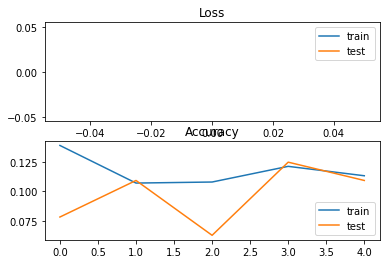

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

ValueError: ignored

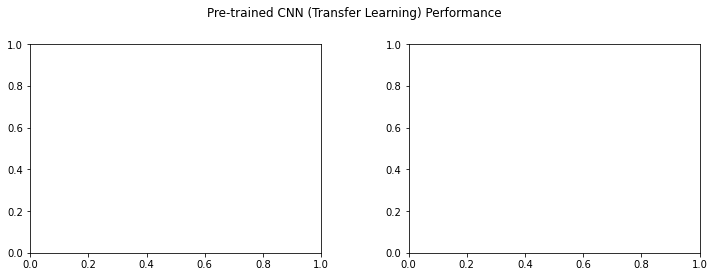

In [ ]:
#import matplotlib as plt
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,5))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")